In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import seaborn as sns
import scipy


In [19]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=9c167ccb8d8f48360ad5c57d43886c735da35e36c9e92be790d0a0451bc9d3c7
  Stored in directory: c:\users\okone\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv("C:/Users/okone/Downloads/forestfires.csv", sep = ",")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 48.5+ KB


In [6]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
X = data[['DMC', 'temp']]

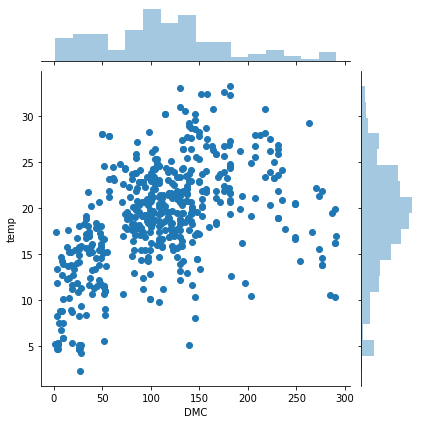

In [11]:
sns.jointplot(x='DMC', y='temp', data=data);

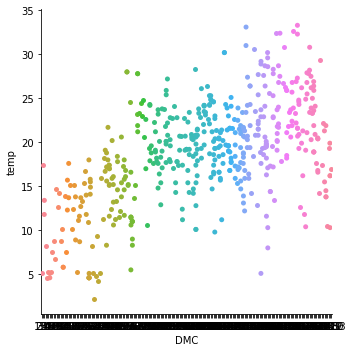

In [12]:
#рассмотрим как варьируется индекс DMC в зависимости от температуры 
sns.catplot(x='DMC',
y='temp',
data=data);

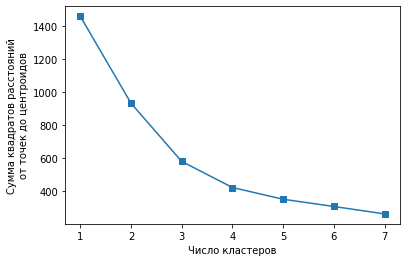

In [13]:
#определим оптимальное количество кластеров для KMeans
from sklearn.cluster import KMeans

inertia = []
for n_c in range(1, 8):
    k_means = KMeans(n_clusters=n_c).fit(X)
    inertia.append(np.sqrt(k_means.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel("Число кластеров")
plt.ylabel("Cумма квадратов расстояний\nот точек до центроидов");

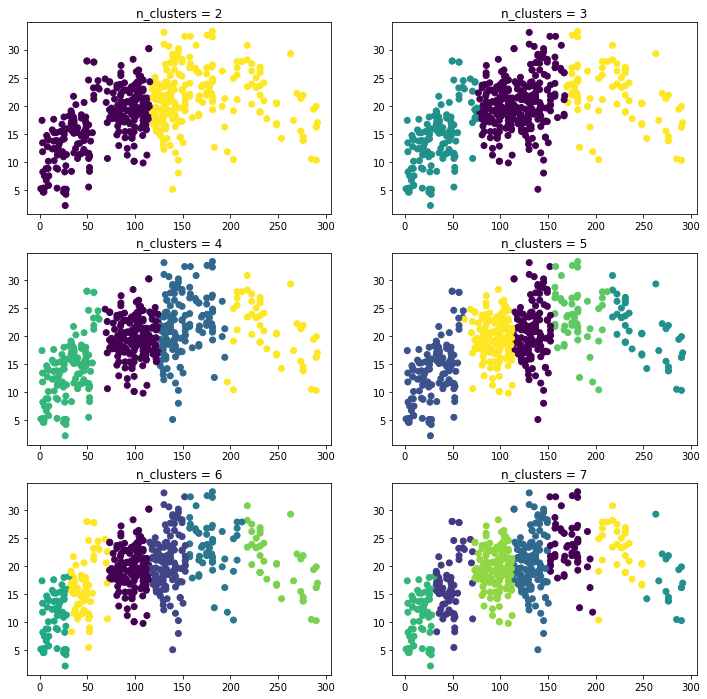

In [15]:
#визулизируем кластеры в зависимости от их количества
plt.figure(figsize=(12, 12))
for n_c in range(2, 8):
  k_means = KMeans(n_clusters=n_c)
  clusters = k_means.fit_predict(X)
  plt.subplot(3, 2, n_c-1)
  plt.scatter(data['DMC'], data['temp'], c=clusters)
  plt.title('n_clusters = {}'.format(n_c))
plt.show()

In [16]:
# на основе коэффициента силуэта определим лучшее количество кластеров
from sklearn.metrics.cluster import silhouette_score
for n_c in range(2, 8):
    k_means = KMeans(n_clusters=n_c)
    cluster =  k_means.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster)
    print("For no of clusters =", n_c,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.5045063106567025
For no of clusters = 3  The average silhouette_score is : 0.6018379899148381
For no of clusters = 4  The average silhouette_score is : 0.5771353374390008
For no of clusters = 5  The average silhouette_score is : 0.569202610414409
For no of clusters = 6  The average silhouette_score is : 0.5387001553402044
For no of clusters = 7  The average silhouette_score is : 0.5430578497500371


In [21]:
#создадим модель KMeans, на основании определенного выше количества кластеров (количество кластеров = 3)
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

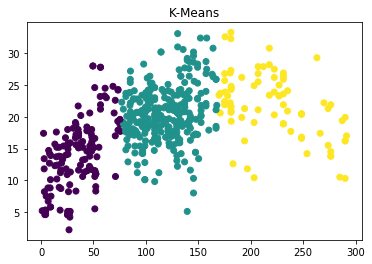

In [22]:
#визуализируем распределение кластеров 
clusters = k_means.fit_predict(X)
plt.scatter(data['DMC'], data['temp'],c=clusters)
plt.title('K-Means')
plt.show()

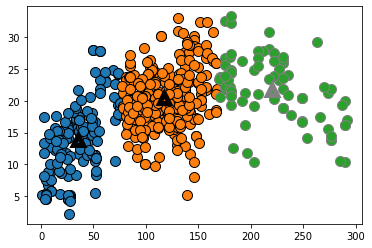

In [23]:
#визуализируем распределение кластеров с указанием центроидов 
mglearn.discrete_scatter(data['DMC'], data['temp'], k_means.labels_, markers='o')
mglearn.discrete_scatter(
 k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], [0, 1, 2],
 markers='^', markeredgewidth=5)

In [24]:
#Фгломеративная кластеризация 
#подберем оптимальное количество кластеров с помощью коэффициента силуэта 
from sklearn.cluster import AgglomerativeClustering
for n_c_agl in range(2, 8):
    agl_cluster = AgglomerativeClustering(n_clusters = n_c_agl,  linkage = 'ward')
    cluster_agl = agl_cluster.fit_predict(X)
    silhouette_avg_agl= silhouette_score(X,cluster_agl)
    print("For no of clusters =", n_c_agl,
          " The average silhouette_score is :", silhouette_avg_agl)

For no of clusters = 2  The average silhouette_score is : 0.5251903239532251
For no of clusters = 3  The average silhouette_score is : 0.5796512532175412
For no of clusters = 4  The average silhouette_score is : 0.5503135539768206
For no of clusters = 5  The average silhouette_score is : 0.5707418360503396
For no of clusters = 6  The average silhouette_score is : 0.5159986603943943
For no of clusters = 7  The average silhouette_score is : 0.5230127956069553


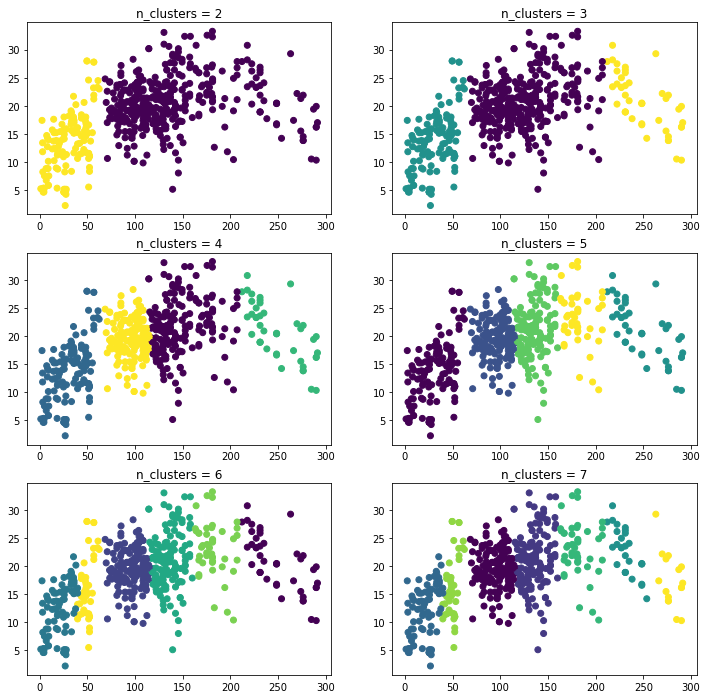

In [26]:
#визулизируем кластеры в зависимости от их количества
plt.figure(figsize=(12, 12))
for n_c_agl in range(2, 8):
  agl_cluster = AgglomerativeClustering(n_clusters=n_c_agl,linkage = 'ward')
  cluster_agl = agl_cluster.fit_predict(X)
  plt.subplot(3, 2, n_c_agl-1)
  plt.scatter(data['DMC'], data['temp'], c=cluster_agl)
  plt.title('n_clusters = {}'.format(n_c_agl))
plt.show()

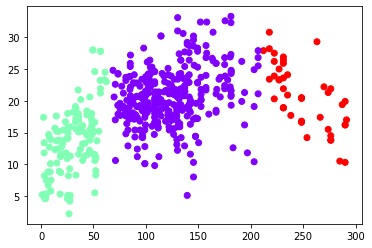

In [27]:
#модель агломеративной кластеризации с 3 кластерами (наилучший результат по коэффициенту силуэта)
agl_cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
cluster_agl = agl_cluster.fit_predict(X)

#визуализация кластеров модели агломеративной кластеризации
plt.scatter(data['DMC'], data['temp'], c = agl_cluster.labels_, cmap = 'rainbow')

Text(0, 0.5, 'Кластерное расстояние')

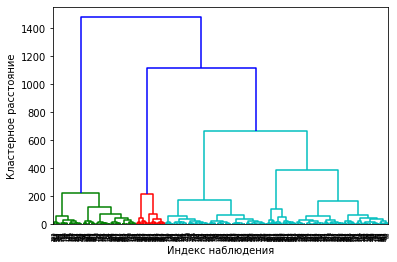

In [30]:
#импортируем функцию денттограмм и функцию кластеризации ward
from scipy.cluster.hierarchy import dendrogram, ward
# применяем кластеризацию ward к массиву данных X (функция SciPy ward возвращает массив с расстояниями
#вычисленными в ходе выполнения агломеративной кластеризации)
linkage_array = ward(X)
# теперь строим дендрограмму для массива связей, содержащего расстояния между кластерами
dendrogram(linkage_array)
plt.xlabel("Индекс наблюдения")
plt.ylabel("Кластерное расстояние")


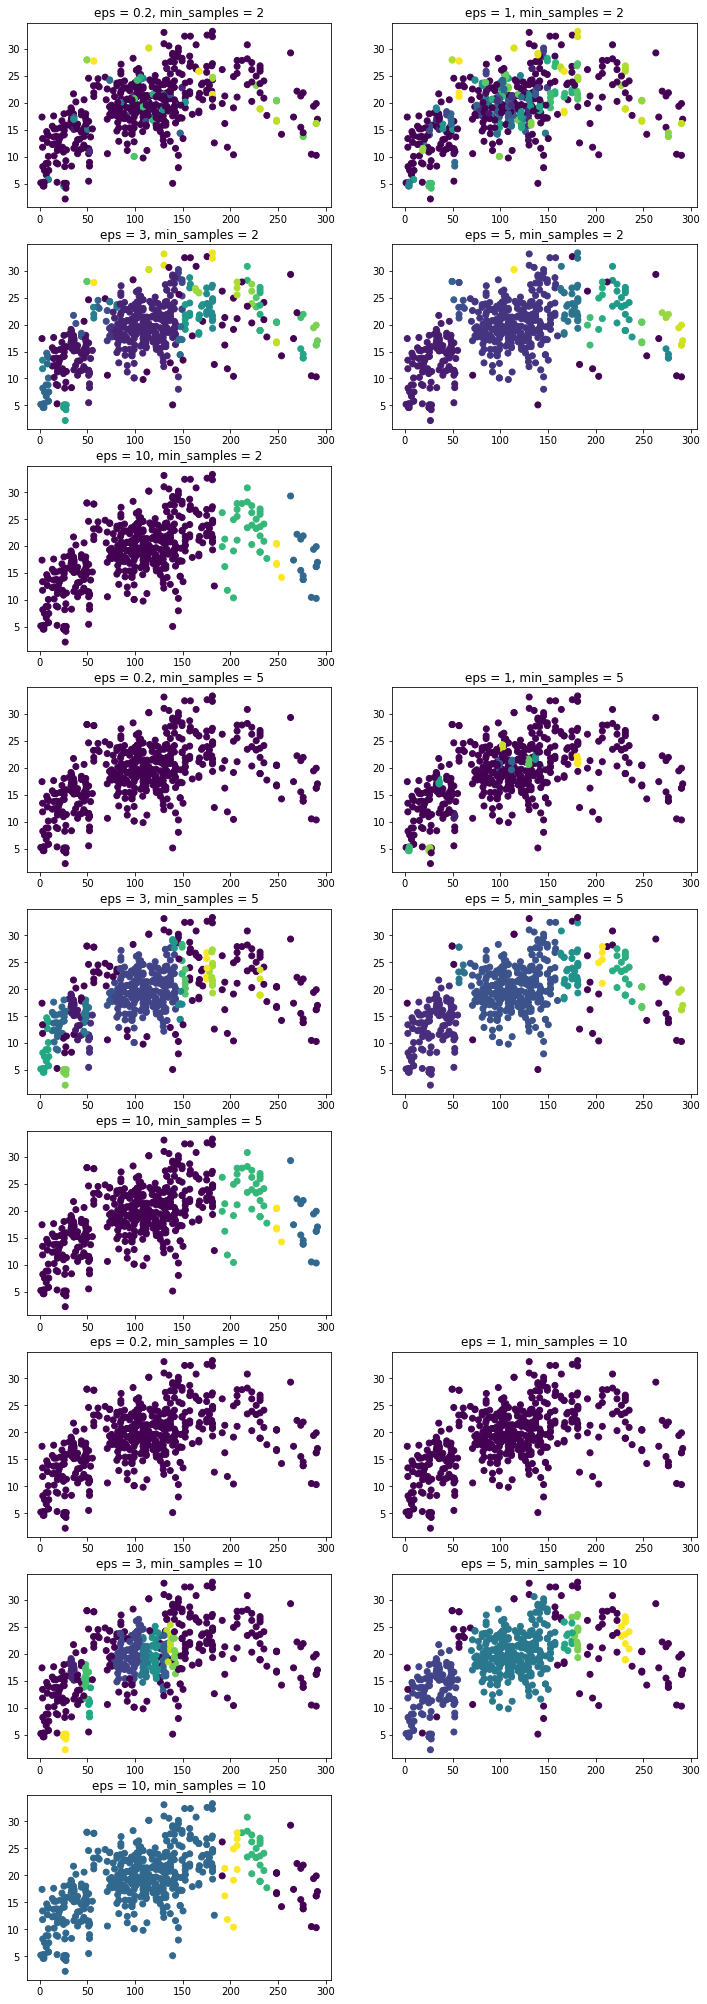

In [31]:
#DBSCAN 
#определим оптмальные гиперпараметры для DBSCAN
from sklearn.cluster import DBSCAN
plt.figure(figsize=(12, 36))
i = 1
for sample in [2, 5, 10]:
  for e in [0.2, 1, 3, 5, 10]:
    dbscan = DBSCAN(eps=e, min_samples=sample)
    clusters_dbscan=dbscan.fit_predict(X)
    plt.subplot(9, 2, i)
    plt.scatter(data['DMC'], data['temp'], c=clusters_dbscan)
    plt.title('eps = {}, min_samples = {}'.format(e, sample))
    i += 1
  i += 1
plt.show()

In [32]:
#модель кластеризации DBSCAN на основе подобранных парамметров 
dbscan = DBSCAN(eps=10, min_samples=2)
clusters_dbscan=dbscan.fit_predict(X)
# определение коэффициента силуэта модели DBSCAN
silhouette_avg_dbscan = silhouette_score(X,clusters_dbscan)
print(" The average silhouette_score is :", silhouette_avg_dbscan)

 The average silhouette_score is : 0.47842700337753485


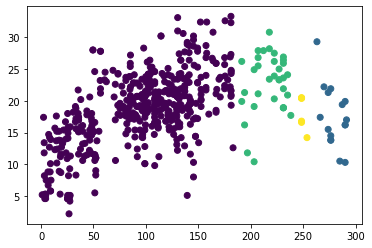

In [33]:
#визуализация кластеров модели DBSCAN
plt.scatter(data['DMC'], data['temp'], c=clusters_dbscan)

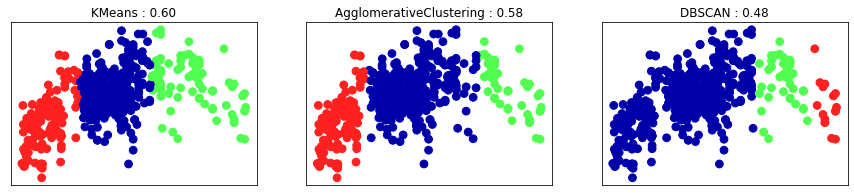

In [34]:
#строим сравнительные графики, использованных алгоритмов кластеризации
fig, axes = plt.subplots(1, 3, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters = 3, linkage = 'ward'),
 DBSCAN(eps=10, min_samples=2)]

for ax, algorithm in zip(axes[0:], algorithms):
 clusters = algorithm.fit_predict(X)
 # выводим на графике принадлежность к кластерам 
 ax.scatter(data['DMC'], data['temp'], c=clusters, cmap=mglearn.cm3,
 s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X, clusters)))

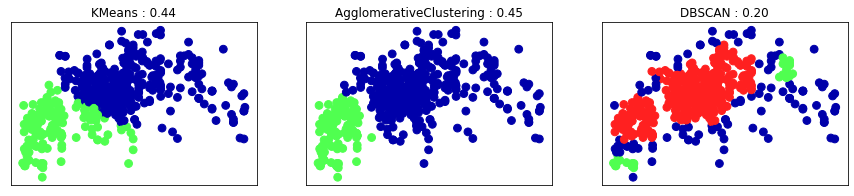

In [35]:
#Рассмотрим, как меняются результаты кластеризации при стандартизированных переменных.
X = data [['temp', 'DMC']]
#Подготовка стандартизации
from sklearn.preprocessing import StandardScaler
stdSc=StandardScaler()
stdSc.fit(X.values)
X=stdSc.transform(X)


#строим сравнительные графики, использованных алгоритмов кластеризации
fig, axes = plt.subplots(1, 3, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters = 2, linkage = 'ward'),
 DBSCAN(eps=0.2, min_samples=5)]

for ax, algorithm in zip(axes[0:], algorithms):
 clusters = algorithm.fit_predict(X)
 # выводим на графике принадлежность к кластерам и центры кластеров
 ax.scatter(X[:, 1], X[:, 0], c=clusters, cmap=mglearn.cm3,
 s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X, clusters)))

In [ ]:
#Для алгоримтвом кластеризации было выбрано два признака 'temp', 'DMC'.

В резльтате работы получили оптимальное количество кластеров - 3, применяя три модели кластеризации:

KMeans(n_clusters=3);

AgglomerativeClustering(n_clusters = 3, linkage = 'ward');

DBSCAN(eps=10, min_samples=2).

Наилучшие результаты были получены методами KMeans и AgglomerativeClustering (на основании коэффициента силуэта).

При этом важно отметить, что при стандартизации входных данных, распределение кластеров (как и их количество) и показатели коэффициента силуэта значительно ухудхушаются. Соотвественно,в случае используемых переменных стандартизация не требуется.